In [1]:
# 1. INICIALIZAÇÃO DOS DADOS
# importar bibliotecas e dados
import re # Importa a biblioteca de expressões regulares
import unicodedata # Importa a biblioteca para manipulação de textos Unicode
import spacy # Importa a biblioteca spaCy para processamento avançado de linguagem natural
import string # Importa a biblioteca string que contém operações comuns de strings
import folium # Importa a biblioteca folium para criação de mapas interativos
import nltk # Importa o Natural Language Toolkit (nltk) para processamento de linguagem natural
import sqlite3 # Importa sqlite3 para interagir com bancos de dados SQLite
import seaborn as sns # Importa seaborn, uma biblioteca de visualização de dados baseada no matplotlib 
import pandas as pd  # Importa pandas, uma biblioteca poderosa para manipulação e análise de dados 
import numpy as np # Importa a biblioteca com suporte a arrays e matrizes multidimensionais,
import matplotlib.pyplot as plt # Importa matplotlib.pyplot para criação de gráficos estáticos, animados e interativos 
from unidecode import unidecode  # Biblioteca para remover acentuação dos caracteres Unicode 
from collections import Counter  # Classe Counter do módulo collections, usada para contar objetos hasháveis
from nltk import word_tokenize  # Função do NLTK para tokenização das palavras em um texto 
from nltk.corpus import stopwords  # Conjunto stopwords do NLTK, palavras comuns que normalmente são ignoradas em buscas e análises  
from nltk.util import ngrams # Fornece funções para gerar sequências de n elementos adjacentes, chamadas de n-gramas
from nltk.probability import FreqDist  # Classe FreqDist do NLTK que computa frequência de distribuição
from wordcloud import WordCloud, STOPWORDS  # Classe WordCloud gera nuvens de palavras & conjunto STOPWORDS padrão
from folium.plugins import MarkerCluster  # Plugin MarkerCluster agrupa marcadores próximos no mapa 
from scipy.stats import gaussian_kde # 'Função que permite estimar a densidade de probabilidade (KDE)
                                       
try:
    # Carrega os dados do web scraping:
    file_name = "2023-11-28.xlsx"    # Define o nome do arquivo a ser importado.
    data = pd.read_excel(file_name)  # Tenta ler o arquivo Excel.
except FileNotFoundError:            # Captura exceções caso o arquivo não seja encontrado.
    print(f'O arquivo {file_name} não foi encontrado.')
except Exception as e:               # Captura qualquer outra exceção durante a leitura do arquivo.
    print(f'Ocorreu um erro ao ler o arquivo: {e}')
    
data.head(3) # Exibe as três primeiras linhas dos dados.

,Keyword,Location,Job_title,Job_link,Company,Company_link,Job_location,Post_time,Applicants_count,Job_description,Seniority_level,Employment_type,Job_function,Industries,Person_hiring
0,Engenheiro+óleo+gás,Brasil,Engenheiro(a) de Vendas e Campo,https://br.linkedin.com/jobs/view/engenheiro-a...,Robert Half,https://www.linkedin.com/company/robert-half-i...,"São Bernardo do Campo, SP",Há 2 semanas,46 candidaturas,A Empresa\n\n\nGrupo nacional de máquinas e eq...,Assistente,Tempo integral,Vendas e Desenvolvimento de negócios,Recrutamento e seleção de pessoal,NaN
1,Engenheiro+óleo+gás,Brasil,Engenheiro de Reservatório Pl (Polo Macau),https://br.linkedin.com/jobs/view/engenheiro-d...,3R Petroleum,https://br.linkedin.com/company/3rpetroleum?tr...,"Rio de Janeiro, RJ",Há 1 mês,57 candidaturas,"Venha Repensar, Redesenvolver e Revitalizar a ...",Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Extração de petróleo e gás natural,NaN
2,Engenheiro+óleo+gás,Brasil,Engenheira ou Engenheiro de Medição e Qualidad...,https://br.linkedin.com/jobs/view/engenheira-o...,ENGIE,https://fr.linkedin.com/company/engie?trk=publ...,Rio de Janeiro e Região,Há 2 semanas,Mais de 200 candidaturas,Missão:\n\nResponsável por auxiliar à Gerência...,Assistente,Tempo integral,Outro,"Serviços de eletricidade, gás, água e esgoto",NaN


In [2]:
# 1. INICIALIZAÇÃO DOS DADOS
# Remover linhas duplicadas
# Obtém o número total de linhas no DataFrame
total_rows = len(data)

# Remove as linhas duplicadas e retorna o novo DataFrame resultante
no_duplicates = data.drop_duplicates()

# Obtém o número de linhas restantes após remover as duplicatas
remaining_rows = len(no_duplicates)

# Calcula o número de linhas duplicadas como a diferença entre o total e as linhas restantes
duplicates = total_rows - remaining_rows

# Calcula diretamente a porcentagem de linhas duplicadas
percentage = (duplicates / total_rows) * 100

# Imprime os resultados
# Adicionada verificação para imprimir uma mensagem adequada caso não haja duplicatas.
if duplicates > 0:
    print(
        f"Há {duplicates} linhas duplicadas, que representam {percentage:.2f}% do total de linhas.\n\n"
        f"Após remover as duplicatas, restam {remaining_rows} linhas."
    )
else:
    print("Não há linhas duplicadas no conjunto de dados.")

Há 2144 linhas duplicadas, que representam 92.73% do total de linhas.

Após remover as duplicatas, restam 168 linhas.


In [3]:
# 1. INICIALIZAÇÃO DOS DADOS
# limpeza inicial dos dados removendo colunas desnecessárias.
# Lista as colunas que não são necessárias e remove-as diretamente.
data_clean = no_duplicates.drop(columns=[
    "Keyword", "Location", "Job_link", "Company_link",
    "Applicants_count", "Seniority_level", "Employment_type",
    "Person_hiring"
], errors='ignore')  # O parâmetro 'errors' é setado como 'ignore' para evitar erro caso alguma das colunas não exista.

# Mostra as primeiras três linhas do DataFrame limpo para inspeção visual rápida.
data_clean.head(3)

,Job_title,Company,Job_location,Post_time,Job_description,Job_function,Industries
0,Engenheiro(a) de Vendas e Campo,Robert Half,"São Bernardo do Campo, SP",Há 2 semanas,A Empresa\n\n\nGrupo nacional de máquinas e eq...,Vendas e Desenvolvimento de negócios,Recrutamento e seleção de pessoal
1,Engenheiro de Reservatório Pl (Polo Macau),3R Petroleum,"Rio de Janeiro, RJ",Há 1 mês,"Venha Repensar, Redesenvolver e Revitalizar a ...",Engenharia e Tecnologia da informação,Extração de petróleo e gás natural
2,Engenheira ou Engenheiro de Medição e Qualidad...,ENGIE,Rio de Janeiro e Região,Há 2 semanas,Missão:\n\nResponsável por auxiliar à Gerência...,Outro,"Serviços de eletricidade, gás, água e esgoto"


In [4]:
# 2. ANALISIE - TÍTULO DA VAGA
# Função para limpar e tokenizar os títulos de trabalho
def clean_job_title(job_title):
    # Convertendo para minúsculas
    text = job_title.lower()
    
    # Normalizando caracteres unicode para ASCII
    text = unicodedata.normalize("NFKD", text).encode("ASCII", "ignore").decode("utf-8")
    
    # Conjunto de siglas dos estados brasileiros para remover
    brazilian_states = {
        'ac', 'al', 'ap', 'am', 'ba', 'ce', 'df', 'es', 'go', 
        'ma','mt', 'ms', 'mg', 'pa', 'pb', 'pr', 'pe',
        'pi','rj','rn','rs','ro','rr','sc','se','sp','to'
    }
    
    # Dicionário de padrões de substituição e suas substituições correspondentes
    replacements = {
        r'\bjr\.?\b': 'junior',
        r'\bpl\.?\b': 'pleno',
        r'\bsr\.?\b': 'senior',
        r'\bi\b':   'junior',
        r'\bii\b':  'pleno',
        r'\biii\b': 'senior',
        r'|'.join([rf'\b{state}\b' for state in brazilian_states]): '',  # Removendo siglas dos estados.
        r'rio de janeiro': ''  # removendo RIO DE JANEIRO.
    }
    
    # Aplicando todas as substituições do dicionário no texto
    for key, value in replacements.items():
        text = re.sub(key, value, text)
    
    # Limpeza adicional para garantir formatação consistente.
    text = re.sub(r"engenheira", "engenheiro", text)
    text = re.sub(r"/.+$", "", text)
    text = re.sub(r"\(.*?\)|-.*?$|\d{2,}", "", text)
    
    # Removendo caracteres especiais exceto letras, números e espaços em branco.
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenizando o título do trabalho limpo em palavras.
    tokens = word_tokenize(text)
    
    # Carregando lista de stopwords em português da NLTK.
    portuguese_stopwords = set(stopwords.words('portuguese'))
     
    # Removendo stopwords da lista tokenizada.
    tokens_without_stopwords = [word for word in tokens if word not in portuguese_stopwords]
     
    # Removendo palavras duplicadas e mantendo a ordem original usando um dicionário ordenado.
    tokens_without_duplicates = list(dict.fromkeys(tokens_without_stopwords))
     
    return tokens_without_duplicates

# Aplicação da função clean_job_title em cada título do trabalho e armazenamento do resultado no DataFrame como uma lista de tokens.
data_clean['Cleaned_Job_Title'] = data_clean['Job_title'].apply(clean_job_title)

data_clean.head(3)

,Job_title,Company,Job_location,Post_time,Job_description,Job_function,Industries,Cleaned_Job_Title
0,Engenheiro(a) de Vendas e Campo,Robert Half,"São Bernardo do Campo, SP",Há 2 semanas,A Empresa\n\n\nGrupo nacional de máquinas e eq...,Vendas e Desenvolvimento de negócios,Recrutamento e seleção de pessoal,"[engenheiro, vendas, campo]"
1,Engenheiro de Reservatório Pl (Polo Macau),3R Petroleum,"Rio de Janeiro, RJ",Há 1 mês,"Venha Repensar, Redesenvolver e Revitalizar a ...",Engenharia e Tecnologia da informação,Extração de petróleo e gás natural,"[engenheiro, reservatorio, pleno]"
2,Engenheira ou Engenheiro de Medição e Qualidad...,ENGIE,Rio de Janeiro e Região,Há 2 semanas,Missão:\n\nResponsável por auxiliar à Gerência...,Outro,"Serviços de eletricidade, gás, água e esgoto","[engenheiro, medicao, qualidade]"


In [5]:
# 2. ANALISIE - TÍTULO DA VAGA
# Convertendo a coluna 'Cleaned_Job_Title' em uma lista única
job_titles = data_clean['Cleaned_Job_Title'].tolist()
job_titles = [title for sublist in job_titles for title in sublist]

# Função para unificar n-gramas que estão em ordem trocada
def unify_ngrams(ngrams_list):
    unified_ngrams = [' '.join(sorted(ngram)) for ngram in ngrams_list]
    return unified_ngrams

# Criando binômios e unificando
bigrams = list(ngrams(job_titles, 2))
unified_bigrams = unify_ngrams(bigrams)

# Criando trinômios e unificando
trigrams = list(ngrams(job_titles, 3))
unified_trigrams = unify_ngrams(trigrams)

# Criando quadrinômios e unificando
quadgrams = list(ngrams(job_titles, 4))
unified_quadgrams = unify_ngrams(quadgrams)

# Agora podemos contar a frequência de cada gramática e imprimir os mais comuns

bigram_frequency = Counter(unified_bigrams)
trigram_frequency = Counter(unified_trigrams)
quadgram_frequency = Counter(unified_quadgrams)

print("Os 45 bigramas mais comuns são: ", bigram_frequency.most_common(45))
print("Os 3 trigramas mais comuns são: ", trigram_frequency.most_common(3))
print("Os 3 quadgramas mais comuns são: ", quadgram_frequency.most_common(3))

Os 45 bigramas mais comuns são:  [('engenheiro pleno', 21), ('engenheiro processos', 18), ('engenheiro qualidade', 15), ('engenheiro quimico', 14), ('engenheiro senior', 12), ('engenheiro equipamentos', 11), ('engenheiro mecanico', 11), ('engenheiro planejamento', 10), ('engenheiro materiais', 10), ('engenheiro projetos', 9), ('engenheiro simulacao', 8), ('eletricista engenheiro', 8), ('engenheiro industrial', 8), ('engenheiro suprimentos', 7), ('civil engenheiro', 7), ('confiabilidade engenheiro', 6), ('automacao engenheiro', 6), ('engenheiro tubulacao', 6), ('engenheiro producao', 6), ('engenheiro operacoes', 6), ('engenheiro suporte', 6), ('compras engenheiro', 6), ('engenheiro rf', 5), ('engenheiro gas', 4), ('engenheiro engenheiro', 4), ('construcao engenheiro', 4), ('engenheiro tubulacoes', 4), ('acustico engenheiro', 4), ('numericas simulacoes', 4), ('pleno projetos', 4), ('engenheiro obra', 4), ('obra pleno', 4), ('engenheiro reservatorio', 3), ('engenheiro medicao', 3), ('medi

In [6]:
# 2. ANALISIE - TÍTULO DA VAGA
# Extrai todas as palavras da coluna 'Cleaned_Job_Title'
all_words = []
for job_titles in data_clean['Cleaned_Job_Title']:
    # Adiciona todas as palavras da lista ao all_words
    all_words.extend(job_titles)

# Utilizamos Counter para contar a frequência de cada palavra
from collections import Counter  # Importar Counter no início do script, se ainda não importado
word_freq = Counter(all_words)

# Transformar o contador em um DataFrame para uma melhor visualização
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Ordenar por frequência em ordem decrescente e redefinir o índice para melhor legibilidade
freq_df = freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)  # Encadeamento melhora a legibilidade

# Mostrar na tela a lista das palavras mais frequentes
print(freq_df.head(10)) 

           Word  Frequency
0    engenheiro        158
1         pleno         21
2     processos         12
3        senior         10
4     qualidade         10
5       quimico          9
6  equipamentos          8
7      projetos          8
8  planejamento          7
9      mecanico          7


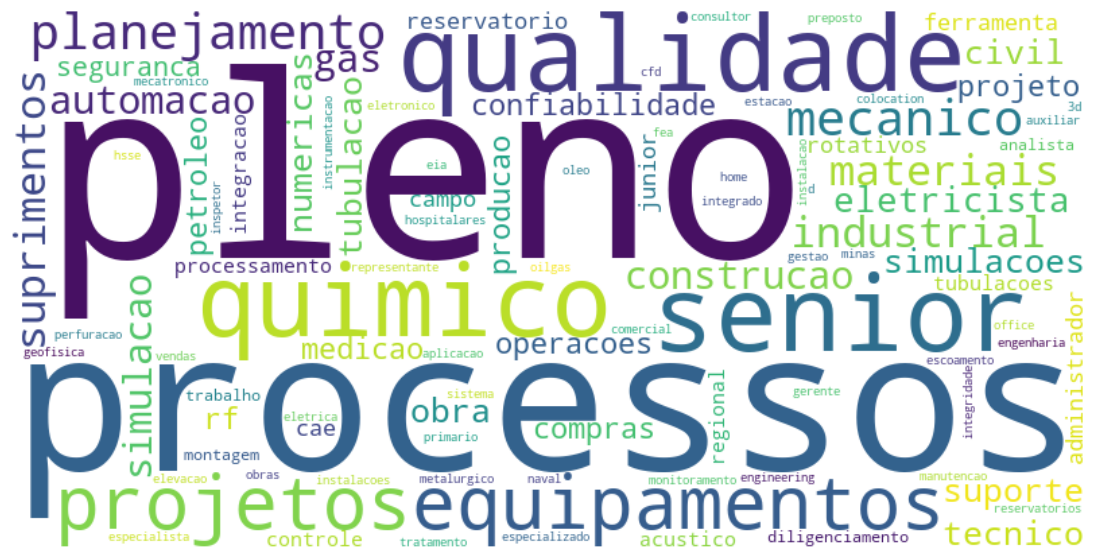

In [7]:
# 2. ANALISIE - TÍTULO DA VAGA
# Remove a palavra "engenheiro" da lista de frequências, pois as vagas procuradas são de engenheiro
word_freq_noeng = word_freq.copy()
del word_freq_noeng["engenheiro"]

# Cria um objeto WordCloud com parâmetros opcionais como cor de fundo e número máximo de palavras a serem exibidas.
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                      max_words=200).generate_from_frequencies(word_freq_noeng)

# Configurando o tamanho da figura para melhor visualização da nuvem de palavras
plt.figure(figsize=(15, 7))

# Exibindo a imagem da nuvem de palavras com interpolação bilinear para suavizar os pixels
plt.imshow(wordcloud, interpolation='bilinear')

# Desligando os rótulos dos eixos para uma visualização mais limpa da nuvem de palavras
plt.axis('off')

# Salva a imagem no diretório atual em formato PNG.
plt.savefig('wordcloud_job_titles.png', format='png', bbox_inches='tight')

# Mostrando a imagem gerada na tela
plt.show()

In [8]:
# 3. ANALISE - EMPRESA
# Cria uma tabela de frequência a partir da coluna 'Company' do DataFrame 'data_clean'
frequency_table = data_clean['Company'].value_counts()

# Exibe a tabela de frequência
print(frequency_table)

Company
Netvagas                                 23
Nucleo Engenharia Consultiva S.A.        21
EngenhariaJob                            18
TrabalhaBrasil                           14
BNE - Banco Nacional de Empregos         13
Engenha                                   9
Wood                                      5
Infotec Brasil                            5
SANDECH                                   4
Caderno Nacional                          4
3R Petroleum                              3
SENAI CIMATEC                             3
MODEC                                     3
KEMPETRO Engenharia                       3
Altera&Ocyan                              3
PetroReconcavo                            3
Perbras                                   2
Vibra Energia                             2
Hays                                      2
SKF Group                                 1
AGF Engenharia                            1
Kelvion Intercambiadores Ltda             1
GFA Engenharia          

In [9]:
# 4. LOCALIZAÇÃO DO EMPREGO
# Função auxiliar para limpar e processar a localização do emprego
def clean_job_location(location):
    # Verifica se o local é NaN ou uma string vazia e retorna placeholders nesse caso.
    if pd.isna(location) or location == "":
        return "-", "-"
    # Remove acentos, converte para minúsculo e remove a expressão "e regiao".
    location = unidecode(location.lower()).replace(" e regiao", "")
    # Particiona a string de localização em município e estado.
    municipality, _, state = location.partition(',')
    # Retorna o município e estado limpos ou placeholder se o estado estiver vazio.
    return municipality.strip(), state.strip() if state else "-"

# Dicionário com as capitais dos estados brasileiros.
capitais_estados = {
    'brasilia': 'df', 'rio de janeiro': 'rj', 'sao paulo': 'sp', 'belo horizonte': 'mg',
    'salvador': 'ba', 'recife': 'pe', 'fortaleza': 'ce', 'manaus': 'am', 'curitiba': 'pr',
    'porto alegre': 'rs', 'goiania': 'go', 'cuiaba': 'mt', 'palmas': 'to', 'rio branco': 'ac',
    'macapa': 'ap', 'porto velho': 'ro', 'boa vista': 'rr', 'florianopolis': 'sc', 'natal': 'rn',
    'joao pessoa': 'pb', 'aracaju': 'se', 'maceio': 'al', 'teresina': 'pi',
    'sao luis': 'ma', 'vitoria': 'es', 'campo grande': 'ms', 'sao jose': 'sc',
    'palmas': 'to', 'rio branco': 'ac', 'porto velho': 'ro', 'boa vista': 'rr'
}

# Aplica a função de limpeza na coluna 'Job_location', criando duas novas colunas 'Municipality' e 'State'.
data_clean[['Municipality', 'State']] = (
    data_clean["Job_location"]
        .apply(clean_job_location)
        .apply(pd.Series)
)

# Converte explicitamente os valores da coluna "Municipality" para strings.
data_clean["Municipality"] = data_clean["Municipality"].astype(str)

# Cria uma máscara para os registros onde a coluna "State" está vazia.
mask_estado_vazio = data_clean["State"] == "-"

# Preenche os estados vazios utilizando o dicionário de capitais dos estados.
data_clean.loc[mask_estado_vazio, "State"] = (
    data_clean["Municipality"]
        .map(capitais_estados)
        .fillna("-")
)

# Remove a coluna original "Job_location", pois não é mais necessária após a limpeza.
data_clean.drop(columns=["Job_location"], inplace=True)

# Exibe as primeiras 3 linhas do DataFrame após as operações de limpeza.
data_clean.head(3)

,Job_title,Company,Post_time,Job_description,Job_function,Industries,Cleaned_Job_Title,Municipality,State
0,Engenheiro(a) de Vendas e Campo,Robert Half,Há 2 semanas,A Empresa\n\n\nGrupo nacional de máquinas e eq...,Vendas e Desenvolvimento de negócios,Recrutamento e seleção de pessoal,"[engenheiro, vendas, campo]",sao bernardo do campo,sp
1,Engenheiro de Reservatório Pl (Polo Macau),3R Petroleum,Há 1 mês,"Venha Repensar, Redesenvolver e Revitalizar a ...",Engenharia e Tecnologia da informação,Extração de petróleo e gás natural,"[engenheiro, reservatorio, pleno]",rio de janeiro,rj
2,Engenheira ou Engenheiro de Medição e Qualidad...,ENGIE,Há 2 semanas,Missão:\n\nResponsável por auxiliar à Gerência...,Outro,"Serviços de eletricidade, gás, água e esgoto","[engenheiro, medicao, qualidade]",rio de janeiro,rj


In [10]:
# 4. LOCALIZAÇÃO DO EMPREGO
# Importa excel com as coordenadas de todos os municípios brasileiros
def remove_acentos(s):  # Remove os acentos de uma string
    # Utiliza normalização Unicode para decompor caracteres acentuados em caracteres e seus sinais diacríticos separados
    # Em seguida, codifica em ASCII ignorando erros (removendo os acentos), e então decodifica para UTF-8
    return (
        unicodedata.normalize("NFKD", s)
        .encode("ascii", "ignore")
        .decode("utf-8")
    )

# Carrega os dados do arquivo 'municipios.xlsx' para um DataFrame do pandas
coordinates = pd.read_excel("municipios.xlsx")

# Converte a coluna 'name' para letras minúsculas e aplica a função remove_acentos para remover os acentos dos nomes dos municípios
coordinates["name"] = coordinates["name"].str.lower().apply(remove_acentos)

# Converte as colunas de coordinates 'lon' (longitude) e 'lat' (latitude) para o tipo float, garantindo que são numéricas
coordinates["lon"] = coordinates["lon"].astype(float)
coordinates["lat"] = coordinates["lat"].astype(float)

# Exibe as primeiras 3 linhas do DataFrame para verificação visual dos dados após o processamento
print(coordinates.head(3))

                    name uf_code        lon        lat
0  alta floresta d'oeste      RO -61.999824 -11.935540
1              ariquemes      RO -63.033269  -9.908463
2                 cabixi      RO -60.544314 -13.499763


In [11]:
# 4. LOCALIZAÇÃO DO EMPREGO
# Adiciona as colunas de longitude e latitude ao dataframe 'data_clean'
data_clean['Municipality_lon'] = 0.0  
data_clean['Municipality_lat'] = 0.0

# Itera sobre as linhas do dataframe 'data_clean' para buscar as coordenadas
for index, row in data_clean.iterrows():
    municipality_name = row['Municipality']
    
    # Encontra as coordenadas correspondentes no dataframe 'coordinates'
    coordinates_row = coordinates[coordinates['name'] == municipality_name]
    
    # Se houver uma correspondência, atualiza as colunas de longitude e latitude
    if not coordinates_row.empty:
        data_clean.at[index, 'Municipality_lon'] = coordinates_row['lon'].values[0]
        data_clean.at[index, 'Municipality_lat'] = coordinates_row['lat'].values[0]

# Exibe as primeiras 3 linhas do DataFrame para verificação visual dos dados após o processamento
data_clean.head(3)

,Job_title,Company,Post_time,Job_description,Job_function,Industries,Cleaned_Job_Title,Municipality,State,Municipality_lon,Municipality_lat
0,Engenheiro(a) de Vendas e Campo,Robert Half,Há 2 semanas,A Empresa\n\n\nGrupo nacional de máquinas e eq...,Vendas e Desenvolvimento de negócios,Recrutamento e seleção de pessoal,"[engenheiro, vendas, campo]",sao bernardo do campo,sp,-46.550257,-23.710304
1,Engenheiro de Reservatório Pl (Polo Macau),3R Petroleum,Há 1 mês,"Venha Repensar, Redesenvolver e Revitalizar a ...",Engenharia e Tecnologia da informação,Extração de petróleo e gás natural,"[engenheiro, reservatorio, pleno]",rio de janeiro,rj,-43.227875,-22.876652
2,Engenheira ou Engenheiro de Medição e Qualidad...,ENGIE,Há 2 semanas,Missão:\n\nResponsável por auxiliar à Gerência...,Outro,"Serviços de eletricidade, gás, água e esgoto","[engenheiro, medicao, qualidade]",rio de janeiro,rj,-43.227875,-22.876652


In [12]:
# 4. LOCALIZAÇÃO DO EMPREGO
# Remova entradas onde 'Municipality' é NaN ou em branco antes de contar as cidades
data_clean = data_clean[pd.notna(data_clean['Municipality']) & (data_clean['Municipality'].str.strip() != '')]

# Contando quantas vezes cada cidade aparece no DataFrame
contador_cidades = Counter(data_clean['Municipality'])

# Criando o mapa do Brasil centrado e com um nível de zoom inicial
mapa_brasil = folium.Map(location=[-14.235004, -51.925282], zoom_start=4)

# Adicionando os marcadores ao mapa
for municipio, grupo in data_clean.groupby('Municipality'):
    if pd.notna(municipio) and municipio.strip():
        # Calcula o tamanho do círculo baseado na contagem daquela cidade específica.
        tamanho_circulo = contador_cidades[municipio] * 0.15  # Ajuste de escala
        
        # Obter a média das coordenadas se houver mais de uma entrada por município.
        lat_municipio = grupo['Municipality_lat'].mean()
        lon_municipio = grupo['Municipality_lon'].mean()
        
        # Verifique se as coordenadas não são NaN antes de adicionar o marcador.
        if pd.notna(lat_municipio) and pd.notna(lon_municipio):
            folium.CircleMarker(
                location=(lat_municipio, lon_municipio),
                radius=tamanho_circulo,
                popup=f"{municipio} ({contador_cidades[municipio]} vezes)",
                color='blue',
                fill=True,
                fill_color='blue'
            ).add_to(mapa_brasil)

# Salvando o mapa em arquivo HTML para visualização
mapa_brasil.save('mapa_brasil.html')
mapa_brasil

In [13]:
# 4. LOCALIZAÇÃO DO EMPREGO
# Criando o mapa do Brasil centrado e com um nível de zoom inicial
mapa_brasil2 = folium.Map(location=[-14.235004, -51.925282], zoom_start=4)

# Agrupamento de marcadores para melhor visualização
marker_cluster = MarkerCluster().add_to(mapa_brasil2)

# Contar quantas vezes cada cidade aparece no DataFrame
cidade_counts = data_clean['Municipality'].value_counts().to_dict()

# Adicionar marcadores ao mapa, ignorando linhas com NaN nas coordenadas
for _, row in data_clean.iterrows():
    # Verificar se as coordenadas são válidas (não são NaN)
    if pd.notnull(row['Municipality_lat']) and pd.notnull(row['Municipality_lon']):
        # A contagem é recuperada usando o nome da cidade como chave no dicionário 'cidade_counts'
        contagem = cidade_counts.get(row['Municipality'], 1)

        # Criar um popup com o nome da cidade e a contagem de aparições
        popup_texto = f"{row['Municipality']} - {contagem}"

        # Criação do marcador com o popup e adicionando-o ao cluster de marcadores
        folium.Marker(
            location=[row['Municipality_lat'], row['Municipality_lon']],
            popup=popup_texto,
            icon=folium.DivIcon(html=f"""<div style="font-family: Arial; color: blue">{contagem}</div>""")
        ).add_to(marker_cluster)

# Salvar o mapa em um arquivo HTML - corrigindo também o nome do arquivo para corresponder à variável do mapa.
mapa_brasil2.save('mapa_brasil2.html')
mapa_brasil2

In [14]:
# supondo que 'data_clean' é o seu dataframe
frequency = data_clean['Municipality'].value_counts()

# para exibir a lista decrescente
frequency = frequency.sort_values(ascending=False)

print(frequency)

Municipality
rio de janeiro           91
sao paulo                21
-                         9
salvador                  7
santos                    5
macae                     5
brasil                    4
ipojuca                   3
sao mateus do sul         3
belo horizonte            2
cajamar                   2
sao jose dos campos       2
sao mateus                2
curitiba                  2
sao bernardo do campo     1
franco da rocha           1
aracruz                   1
limeira                   1
cravinhos                 1
maceio                    1
diadema                   1
valparaiso                1
carmopolis                1
rio das ostras            1
Name: count, dtype: int64


In [15]:
# 5. DATA DA POSTAGEM
# Define uma função para converter uma string relacionada a tempo em número de dias.
def convert_to_days(time_str):
    # Separa a string por espaço para obter os componentes: [quantidade, unidade].
    quantity, unit = time_str.split(' ')[1:3]
    quantity = int(quantity)  # Converte a quantidade para um inteiro.

    # Define um dicionário mapeando unidades de tempo para seu equivalente em dias.
    time_to_days = {
        'hora': 1 / 24,
        'horas': 1 / 24,
        'dia': 1,
        'dias': 1,
        'semana': 7,
        'semanas': 7,
        'mês': 30,
        'meses': 30
    }

    # Calcula os dias com base na unidade utilizando o fator de conversão do dicionário.
    return int(quantity * time_to_days[unit])

# Aplica a função a cada linha do dataframe e cria uma nova coluna 'Days_since_post'.
data_clean['Days_since_post'] = data_clean.apply(lambda row: convert_to_days(row['Post_time']), axis=1)

# Remove a coluna agora desnecessária 'Post_time'.
data_clean.drop(columns=['Post_time'], inplace=True)

# Calcula as estatísticas descritivas básicas para 'Days_since_post':
descriptive_stats = data_clean['Days_since_post'].describe()
print(descriptive_stats)

# Adicionalmente calcula mediana, moda e variância:
median_value = data_clean['Days_since_post'].median()
mode_value = data_clean['Days_since_post'].mode()[0]  # [0] pois mode() retorna uma Series
variance_value = data_clean['Days_since_post'].var()

# Imprime essas estatísticas adicionais:
print(f"Mediana: {median_value}")
print(f"Moda: {mode_value}")
print(f"Variância: {variance_value}")

count    168.00000
mean      43.62500
std       43.16362
min        0.00000
25%       14.00000
50%       30.00000
75%       60.00000
max      180.00000
Name: Days_since_post, dtype: float64
Mediana: 30.0
Moda: 30
Variância: 1863.0980538922156


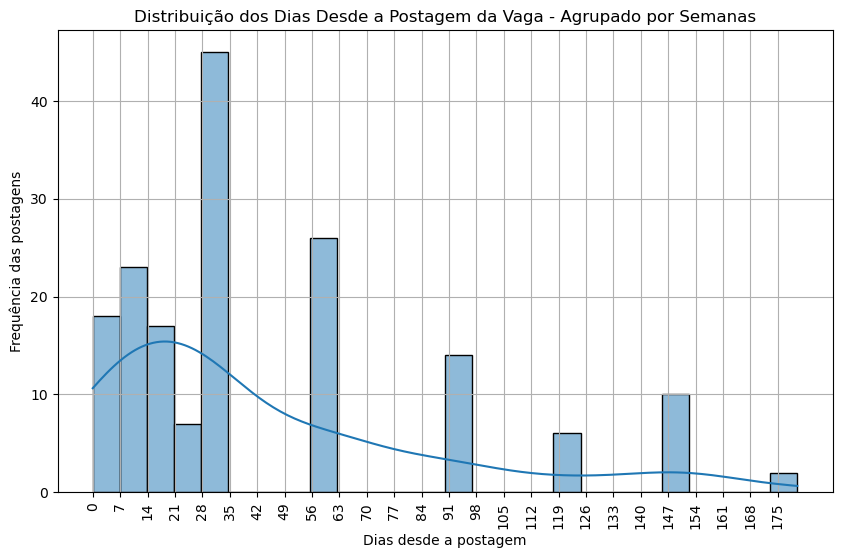

In [16]:
# 5. DATA DA POSTAGEM
# Histograma do tempo decorrido desde a postagem das vagas de emprego
plt.figure(figsize=(10, 6))  # Configura o tamanho da figura para melhor visualização

# Calcula o número máximo de dias desde a última postagem no dataset limpo 'data_clean'
dias_maximos = data_clean['Days_since_post'].max()

# Calcula o número total de semanas correspondente aos dias máximos,
# arredondando para cima caso não seja um múltiplo exato de sete.
semanas_totais = (dias_maximos // 7) + (dias_maximos % 7 > 0)

# Plota um histograma com estimativa de densidade (KDE) usando Seaborn
sns.histplot(data_clean['Days_since_post'], bins=semanas_totais, kde=True)

# Define os ticks do eixo x em intervalos semanais (cada tick representa uma semana)
xticks_semanais = range(0, dias_maximos + 1, 7)
plt.xticks(xticks_semanais)
plt.xticks(xticks_semanais, rotation=90) # Insere os xticks na vertical

# Adiciona título e rótulos aos eixos com informações claras sobre os dados representados
plt.title('Distribuição dos Dias Desde a Postagem da Vaga - Agrupado por Semanas')
plt.xlabel('Dias desde a postagem')
plt.ylabel('Frequência das postagens')

plt.grid(True)  # Habilita a grade no gráfico para facilitar a leitura dos dados

# Exporta o gráfico em alta resolução
plt.savefig('histograma_dias_desde_postagem.png', dpi=300)

plt.show()  # Exibe o gráfico na tela

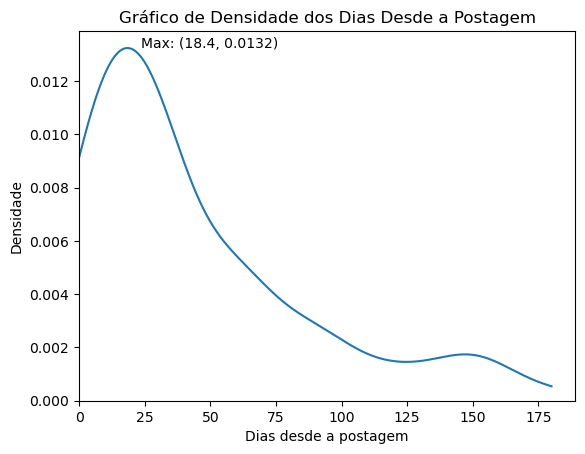

In [17]:
# 5. DATA DA POSTAGEM
# Supondo que data_clean['Days_since_post'] é uma série pandas com seus dados
data_post_time = data_clean['Days_since_post']

# Calcula a densidade dos dados
density = gaussian_kde(data_post_time)

# Cria um conjunto de pontos para avaliar a densidade em cima deles
x_vals = np.linspace(0, max(data_post_time), 1000)
y_vals = density(x_vals)

# Encontra o índice do ponto máximo (pico)
max_idx = np.argmax(y_vals)
max_x = x_vals[max_idx]
max_y = y_vals[max_idx]

# Plota a densidade dos dias desde a postagem
plt.plot(x_vals, y_vals)

# Configura o título do gráfico
plt.title('Gráfico de Densidade dos Dias Desde a Postagem')

# Configura o rótulo do eixo x
plt.xlabel('Dias desde a postagem')

# Configura o rótulo do eixo y
plt.ylabel('Densidade')

# Ajusta os limites dos eixos para mostrar apenas valores positivos
plt.xlim(left=0)  # Define o limite inferior do eixo X como 0
plt.ylim(bottom=0)  # Define o limite inferior do eixo Y como 0

# Anotação do ponto máximo no gráfico
plt.annotate(f'Max: ({max_x:.1f}, {max_y:.4f})',
             xy=(max_x, max_y),
             xytext=(max_x+5, max_y))

# Salva o gráfico em alta resolução
plt.savefig('densidade_dias_desde_postagem.png', dpi=300)

# Exibe o gráfico com a anotação do ponto máximo
plt.show()

In [18]:
# 5. DATA DA POSTAGEM
from scipy.stats import skew, kurtosis

# Calcula a assimetria da distribuição dos dias desde a postagem
skewness = skew(data_clean['Days_since_post'])

# Calcula a curtose da distribuição dos dias desde a postagem
kurt = kurtosis(data_clean['Days_since_post'])

# Exibe a assimetria calculada
print(f"Assimetria: {skewness}")

# Exibe a curtose calculada
print(f"Curtose: {kurt}")

Assimetria: 1.3626752126797095
Curtose: 1.0851784213606468


In [19]:
# 6. FUNÇÃO DE TRABALHO E INDÚSTRIAS
# Para a coluna Função de Trabalho (Job_function):
# Cria uma tabela de frequência para a coluna Job_function com contagem dos valores e reinicia o índice.
job_freq_table = data_clean['Job_function'].value_counts().reset_index()
# Renomeia as colunas da tabela de frequência para 'Função de Trabalho' e 'Frequência'.
job_freq_table.columns = ['Função_de_Trabalho', 'Frequência']

# Para a coluna Indústrias (Industries):
# Cria uma tabela de frequência para a coluna Industries com contagem dos valores e reinicia o índice.
industry_freq_table = data_clean['Industries'].value_counts().reset_index()
# Renomeia as colunas da tabela de frequência para 'Indústrias' e 'Frequência'.
industry_freq_table.columns = ['Indústrias', 'Frequência']

# Exibe as tabelas de frequência para ambas as categorias.
print("Tabela de Frequência - Função de Trabalho:")
print(job_freq_table)
print("\nTabela de Frequência - Indústrias:")
print(industry_freq_table)

Tabela de Frequência - Função de Trabalho:
                                   Função_de_Trabalho  Frequência
0               Engenharia e Tecnologia da informação          85
1                          Gerenciamento e Manufatura          45
2                     Compras e Cadeia de suprimentos           8
3                            Tecnologia da informação           7
4                               Controle de qualidade           7
5                Vendas e Desenvolvimento de negócios           3
6                                       Administração           3
7                                          Engenharia           3
8                                               Outro           2
9                              Vendas e Gerenciamento           1
10  Tecnologia da informação, Consultoria e Engenh...           1
11     Consultoria, Tecnologia da informação e Vendas           1

Tabela de Frequência - Indústrias:
                                           Indústrias  Frequênc

In [20]:
# 7. DESCRIÇÃO DO TRABALHO
nlp = spacy.load('pt_core_news_sm')  # Carrega o modelo de língua portuguesa do spaCy.
special_chars_pattern = re.compile(r'[^a-zA-Z0-9áéíóúàèìòùâêîôûãõäëïöüç\s]')  # Padrão regex para identificar caracteres especiais.
stopwords_pt = nlp.Defaults.stop_words  # Define a lista de stopwords em português.

# Função para pré-processar texto removendo caracteres especiais e stopwords.
def preprocess_text(text):
    text = special_chars_pattern.sub('', text)  # Remove caracteres especiais do texto.
    text = text.lower()  # Converte o texto para minúsculas.
    doc = nlp(text)  # Cria um objeto Doc com o texto processado pelo spaCy.
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.lower_ in stopwords_pt]  # Gera tokens aplicando lematização e removendo pontuações, espaços e stopwords.
    return tokens  # Retorna uma lista de tokens ao invés de uma string.

data_clean['Cleaned_Job_Description'] = data_clean['Job_description'].apply(preprocess_text)  # Pré-processa cada descrição de trabalho no DataFrame.

# Calcula as frequências das palavras em listas de tokens.
def calculate_word_frequencies(token_lists):
    all_tokens = [token for sublist in token_lists for token in sublist]  # Concatena todas as listas de tokens em uma única lista plana.
    freq_distribution = FreqDist(all_tokens)  # Cria uma distribuição de frequência com os tokens concatenados.
    return freq_distribution

freq_dist_before_removal = calculate_word_frequencies(data_clean['Cleaned_Job_Description'])  # Calcula a distribuição de frequência antes da remoção das palavras raras.

threshold_rare_words = 1  # Define o limiar para considerar palavras como raras. Remove erros de digitação ou palavras raras.
rare_words_to_remove = {word for word, count in freq_dist_before_removal.items() if count < threshold_rare_words}  # Identifica palavras raras que aparecem menos vezes que o limiar.

# Remove palavras raras da lista de tokens.
def remove_rare_words(token_list):
    return [token for token in token_list if token not in rare_words_to_remove]

# Aplica a função 'remove_rare_words' para cada linha do DataFrame, atualizando a coluna 'Cleaned_Job_Description'.
data_clean['Cleaned_Job_Description'] = data_clean['Cleaned_Job_Description'].apply(remove_rare_words)

freq_dist_after_removal = calculate_word_frequencies(data_clean['Cleaned_Job_Description'])  # Calcula a distribuição de frequência após a remoção das palavras raras.
df_frequencies_after_removal = pd.DataFrame(freq_dist_after_removal.most_common(), columns=['Word', 'Frequency'])  # Cria um DataFrame com as palavras e suas respectivas frequências.

# Exibe os top-20 resultados mais frequentes após remover as palavras raras.
print(df_frequencies_after_removal.head(20))

            Word  Frequency
0        projeto        553
1        técnico        339
2     engenharia        332
3   conhecimento        287
4            gás        239
5       processo        236
6    experiência        202
7      atividade        201
8        serviço        164
9        cliente        162
10      realizar        161
11          óleo        155
12       empresa        147
13   equipamento        146
14        gestão        146
15       análise        145
16        equipe        135
17      trabalho        131
18       suporte        120
19      produção        118


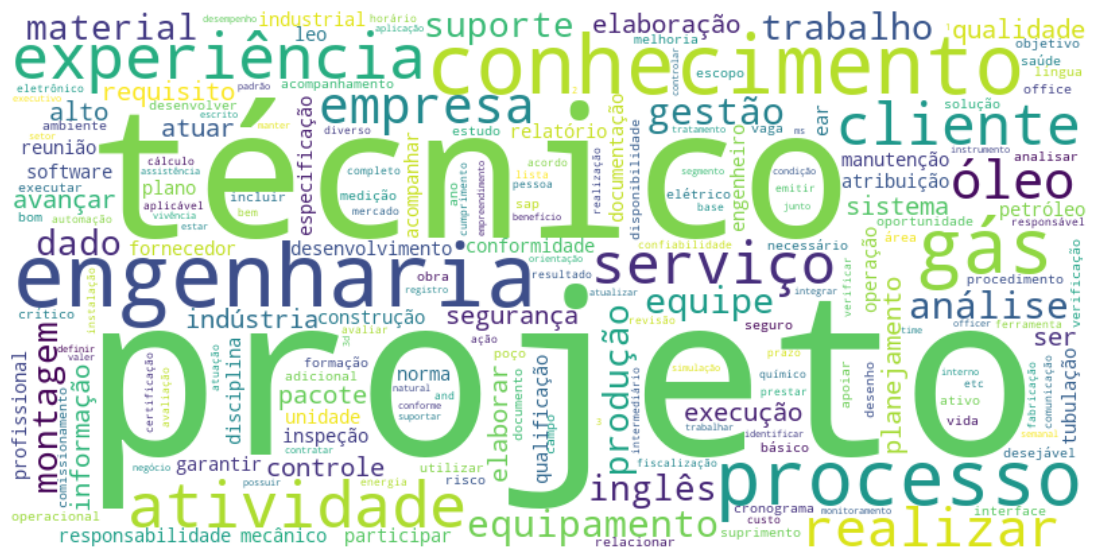

In [21]:
# 7. DESCRIÇÃO DO TRABALHO
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white', 
                      max_words=200).generate_from_frequencies(freq_dist_after_removal)

# Configurando o tamanho da figura para melhor visualização da nuvem de palavras
plt.figure(figsize=(15, 7))

# Exibindo a imagem da nuvem de palavras com interpolação bilinear para suavizar os pixels
plt.imshow(wordcloud, interpolation='bilinear')

# Desligando os rótulos dos eixos para uma visualização mais limpa da nuvem de palavras
plt.axis('off')

# Salva a imagem no diretório atual em formato PNG.
plt.savefig('wordcloud_job_descriptions.png', format='png', bbox_inches='tight')

# Mostrando a imagem gerada na tela
plt.show()

In [22]:
# 8. DATA DO WEB SCRAPING 
# Usando expressão regular para extrair a data do nome do arquivo
# A expressão regular abaixo busca por qualquer sequência que corresponda ao padrão de data YYYY-MM-DD
match = re.search(r'\d{4}-\d{2}-\d{2}', file_name)

if match:
    # Se encontrou uma correspondência, extraia a string da data
    date_str = match.group(0)
else:
    # Se não encontrou a data, você pode definir um valor padrão ou emitir um erro
    date_str = None  # ou levante um erro

# Vamos adicionar uma nova coluna com a mesma data para todas as linhas
if date_str:
    # Convertendo a string da data para o tipo datetime antes de adicionar ao dataframe
    date_ws = pd.to_datetime(date_str)
    
    # Criando uma coluna 'date_ws' no dataframe com esta data
    data_clean['Date_ws'] = date_ws

data_clean.head(3)

,Job_title,Company,Job_description,Job_function,Industries,Cleaned_Job_Title,Municipality,State,Municipality_lon,Municipality_lat,Days_since_post,Cleaned_Job_Description,Date_ws
0,Engenheiro(a) de Vendas e Campo,Robert Half,A Empresa\n\n\nGrupo nacional de máquinas e eq...,Vendas e Desenvolvimento de negócios,Recrutamento e seleção de pessoal,"[engenheiro, vendas, campo]",sao bernardo do campo,sp,-46.550257,-23.710304,14,"[empresa, nacional, máquina, equipamento, pesa...",2023-11-28
1,Engenheiro de Reservatório Pl (Polo Macau),3R Petroleum,"Venha Repensar, Redesenvolver e Revitalizar a ...",Engenharia e Tecnologia da informação,Extração de petróleo e gás natural,"[engenheiro, reservatorio, pleno]",rio de janeiro,rj,-43.227875,-22.876652,30,"[vir, repensar, redesenvolver, revitalizar, pr...",2023-11-28
2,Engenheira ou Engenheiro de Medição e Qualidad...,ENGIE,Missão:\n\nResponsável por auxiliar à Gerência...,Outro,"Serviços de eletricidade, gás, água e esgoto","[engenheiro, medicao, qualidade]",rio de janeiro,rj,-43.227875,-22.876652,14,"[missão, responsável, auxiliar, gerência, tran...",2023-11-28


In [23]:
# 9. BANCO DE DADOS
# Conectar ao banco de dados SQLite; se ele não existir, será criado.
conn = sqlite3.connect('vagas_emprego.db')

# Criar uma tabela no banco de dados para inserir os dados.
create_table_query = '''
CREATE TABLE IF NOT EXISTS job_listings (
    Job_title TEXT,
    Company TEXT,
    Job_description TEXT,
    Job_function TEXT,
    Industries TEXT,
    Cleaned_Job_Title TEXT,
    Municipality TEXT,
    State TEXT,
    Municipality_lon REAL,
    Municipality_lat REAL,
    Days_since_post INTEGER,
    Cleaned_Job_Description TEXT,
    Date_ws DATE
)
'''
conn.execute(create_table_query)

# Carregar todas as entradas existentes em um DataFrame do pandas
existing_data_query = "SELECT Job_title, Company, Job_description, Municipality FROM job_listings"
existing_data = pd.read_sql(existing_data_query, conn)

# Assegurando que os tipos dos dados estão corretos antes da comparação
data_clean['Job_title'] = data_clean['Job_title'].astype(str)
data_clean['Company'] = data_clean['Company'].astype(str)
data_clean['Job_description'] = data_clean['Job_description'].astype(str)
data_clean['Municipality'] = data_clean['Municipality'].astype(str)

# Filtrar fora as entradas duplicadas com base nas colunas especificadas
columns_to_check = ['Job_title', 'Company', 'Job_description', 'Municipality']
deduplicated_data = data_clean[~data_clean[columns_to_check].apply(tuple, 1).isin(existing_data[columns_to_check].apply(tuple, 1))]

# Converter lista para string separada por vírgula
deduplicated_data = data_clean[~data_clean[columns_to_check].apply(tuple, 1).isin(existing_data[columns_to_check].apply(tuple, 1))].copy()
deduplicated_data['Cleaned_Job_Title'] = deduplicated_data['Cleaned_Job_Title'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)
deduplicated_data['Cleaned_Job_Description'] = deduplicated_data['Cleaned_Job_Description'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)

# Converter datetime para string no formato adequado (YYYY-MM-DD)
deduplicated_data['Date_ws'] = deduplicated_data['Date_ws'].dt.strftime('%Y-%m-%d')

# Inserir os dados únicos do DataFrame 'deduplicated_data' na tabela 'job_listings'.
try:
    num_entries_before_insertion = existing_data.shape[0]
    num_new_entries = deduplicated_data.shape[0]
    if num_new_entries > 0:
        deduplicated_data.to_sql('job_listings', conn, if_exists='append', index=False)
        print(f"{num_new_entries} entradas únicas novas foram adicionadas.")
    else:
        print("Não há novas entradas únicas para adicionar.")
except Exception as e:
    print(f"Ocorreu um erro ao inserir os dados: {e}")
finally:
    # Fechar a conexão com o banco de dados
    conn.close()

# Consulta para verificar o tamanho atual do banco de dados.
conn_recheck = sqlite3.connect('vagas_emprego.db')
db_size_query = "SELECT COUNT(*) FROM job_listings"
db_size_result = pd.read_sql(db_size_query, conn_recheck).iloc[0][0]
conn_recheck.close()
print(f"Tamanho atual do banco de dados: {db_size_result} entradas.")

Não há novas entradas únicas para adicionar.
Tamanho atual do banco de dados: 236 entradas.
